# Multiplexing A 
---------------------------------------------

In [1]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}

from matplotlib import pyplot as plt
matplotlib.rcParams.update(params)
import random
import math
from ipywidgets import *

print('The libraries loaded successfully')

The libraries loaded successfully


This chapter explores the statistical sharing of resources.  The main tool is the central limit theorem that enables the calculation of confidence intervals.  Along the way, we discuss Gaussian random variables.

## Central Limit Theorem for Coin Flips

You flip a biased coin $N$ times.  The probability of heads is $p$.  Let $X(N)$ be the number of heads.  Then,

$$P(X(N) = n) = {N \choose n} p^n (1 - p)^{N-n}, n = 0, 1, \ldots, N. \tag{3.1}$$

The main result is as follows:

### Theorem (CLT)

One has

$$\frac{X(N) - Np}{\sqrt{Np(1-p)}} \Rightarrow {\cal N}(0,1) \mbox{ as } N \to \infty. \tag{3.2}$$

This result states that, when $N$ is large, the random variable on the left of (3.2) is almost distributed like a ${\cal N}(0,1)$ random variable $X$.  By definition, $X =_D {\cal N}(0,1)$ if its p.d.f. is $f(x)$ where

$$f(x) = \frac{1}{\sqrt{2 \pi}} \exp\{- \frac{x^2}{2}\}. \tag{3.3}$$

The graph below illustrates that result. But firrst, we display the widgets.

In [2]:
def dummy(px, Nd):
    global p, N
    p, N = float(px), int(Nd)
px = widgets.Dropdown(options=['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'],value='0.5',description='p',disabled=False)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, px = px, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='p', index=4, options=('0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0…

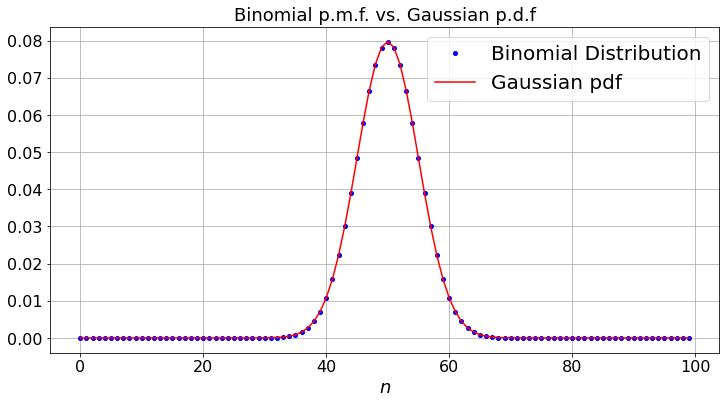

In [3]:
def bino_demo(N,p):
    a = np.arange(0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0, N)
    A = (N*p*(1-p))**(-0.5)*(2*math.pi)**(-0.5)
    b[0]=(1 - p)**(N)
    for i in range(1,N):
        b[i] = p/(1-p)*b[i-1]*(N - i +1)/i 
        c[i] = A*np.exp(- ((i - N*p)**2)/(2*p*(1-p)*N))
        
        x = np.arange(N)
        
    fig, ax = plt.subplots()
    plt.xlabel("$n$")
    plt.title('Binomial p.m.f. vs. Gaussian p.d.f')
    x = np.arange(N)
    ax.plot(x, binom.pmf(x, N, p), 'bo', ms=4,label = 'Binomial Distribution')
    ax.plot(a, c, color='r', label = "Gaussian pdf")
    ax.grid(True)
    ax.legend()
    plt.show()

bino_demo(N,p)



## Properties of Gaussian Random Variables

We use frequently the following values:

**Fact 1:**

Let $X =_D {\cal N}(0,1)$. Then

$$ P(|X| > 1.65) \approx 10\% \tag{3.4}$$

$$P(|X| > 2) \approx 5\% \tag{3.5}.$$

The following table gives more values of $g(x) = P(|X| > x)$.  


In [4]:
for k in range(6):
    Values = 0.6*k + 0.1*np.arange(6)
    COLUMNS = ['x = ']
    for value in Values:
        COLUMNS.append(str(round(value,2)))
    df = pd.DataFrame(columns=COLUMNS, dtype=object)
    df.at[0,'x = '] = 'P(SG > x) = '
    vals = 1 - norm.cdf(Values, 0)
    for n in range(6):
        df.iloc[0,1+n] = str(round(vals[n],6))
    blankIndex=[''] * len(df) # prepare blank index
    df.index = blankIndex # set index to blank index
    print(df) # print DataFrame
    print('')

          x =   0.0       0.1      0.2       0.3       0.4       0.5
  P(SG > x) =   0.5  0.460172  0.42074  0.382089  0.344578  0.308538

          x =        0.6       0.7       0.8      0.9       1.0       1.1
  P(SG > x) =   0.274253  0.241964  0.211855  0.18406  0.158655  0.135666

          x =       1.2     1.3       1.4       1.5       1.6       1.7
  P(SG > x) =   0.11507  0.0968  0.080757  0.066807  0.054799  0.044565

          x =       1.8       1.9      2.0       2.1       2.2       2.3
  P(SG > x) =   0.03593  0.028717  0.02275  0.017864  0.013903  0.010724

          x =        2.4      2.5       2.6       2.7       2.8       2.9
  P(SG > x) =   0.008198  0.00621  0.004661  0.003467  0.002555  0.001866

          x =       3.0       3.1       3.2       3.3       3.4       3.5
  P(SG > x) =   0.00135  0.000968  0.000687  0.000483  0.000337  0.000233



**Definition:** ${\cal N}(\mu, \sigma^2)$

The random variable $Y$ is said to be Gaussian with mean $\mu$ and variance $\sigma^2$, which we write as $Y =_D {\cal N}(\mu, \sigma^2)$, if we can write $Y = \mu + \sigma X$ where $X =_D {\cal N}(0, 1)$.  Equivalently, the pdf of $Y$ is given by

$$f_Y(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\{- \frac{(x - \mu)^2}{2 \sigma^2}\}. \tag{3.6}$$

Equivalently, $Y$ is such that

$$E(\exp\{i u Y\}) = \exp\{i u \mu - \frac{1}{2} u^2 \sigma^2\}. \tag{3.7}$$

**Theorem: Sum of Independent Gaussians**

Let $X_i =_D {\cal N}(\mu_i, \sigma_i^2)$ for $i = 1, 2$ be independent.  Then, 

$$X_1 + X_2 =_D {\cal N}(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2). \tag{3.8}$$

## CLT for i.i.d. Random Variables

**Theorem (CLT)**
Let $Y_1, Y_2, \ldots$ be independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$. Let also $X(N) = Y_1 + \cdots + Y_N$.  Then

$$\frac{X(N) - N \mu}{\sigma\sqrt{N}} \Rightarrow {\cal N}(0,1). \tag{3.9}$$

The book sketches a proof. The method is to calculate $E(\exp\{iuZ(N)\})$ where $Z(N)$ is the left-hand side of (3.8) and to show that this expression converges $\exp\{- u^2/2\}$.  

## Confidence Intervals

Let $Y_1, Y_2, \ldots$ be as in the theorem above.  Using (3.4) we find that, for $N \gg 1$,

$$P(|\frac{X(N) - N\mu}{\sigma \sqrt{N}}| > 2) \approx 5\%. $$

Equivalently, 

$$P(\mu \in [\frac{X(N)}{N} - \frac{2\sigma}{\sqrt{N}}, \frac{X(N)}{N} + \frac{2\sigma}{\sqrt{N}} ]) \approx 95\%. \tag{3.10}$$

One writes that

$$ [\frac{X(N)}{N} - \frac{2\sigma}{\sqrt{N}}, \frac{X(N)}{N} + \frac{2\sigma}{\sqrt{N}} ] \mbox{ is a } 95\% \mbox{ confidence interval for } \mu. \tag{3.11}$$

In many applications, one wishes to estimate $\mu$ and one uses $X(N)/N$ as an estimate.  Then (3.11) provides a confidence interval for $\mu$.  In many cases, one does not know $\sigma$.  There are two possible ways for deriving a confidence interval in such cases: either using an upper bound for $\sigma$ or replacing $\sigma^2$ by the empirical variance $\sigma_N^2$ defined by

$$\sigma_N^2 := \frac{1}{N-1} \sum_{n=1}^N Y_n^2 - (\frac{X(N)}{N})^2. \tag{3.12}$$

### Coin Flips

The following plot illustrates that result for coin flips.  In that case, one has $\sigma = \sqrt{p(1-p)} \leq 0.5$.  Hence, replacing $\sigma$ by $0.5$ in (3.11), we find that

$$[\frac{X(N)}{N} - \frac{1}{\sqrt{N}}, \frac{X(N)}{N} + \frac{1}{\sqrt{N}} ] \mbox{ is a } 95\% \mbox{ confidence interval for } p. \tag{3.13}$$

We simulate the coin flips and plot $X(n)/n \pm 1/\sqrt{n}.$  For comparison, we also plot $X(n)/n \pm 2 \sigma_n/\sqrt{n}$.


In [5]:
def dummy(pd, Nd):
    global p, N
    p, N = float(pd), int(Nd)
pd = widgets.Dropdown(options=['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'],value='0.5',description='p',disabled=False)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, pd = pd, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='p', index=4, options=('0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0…

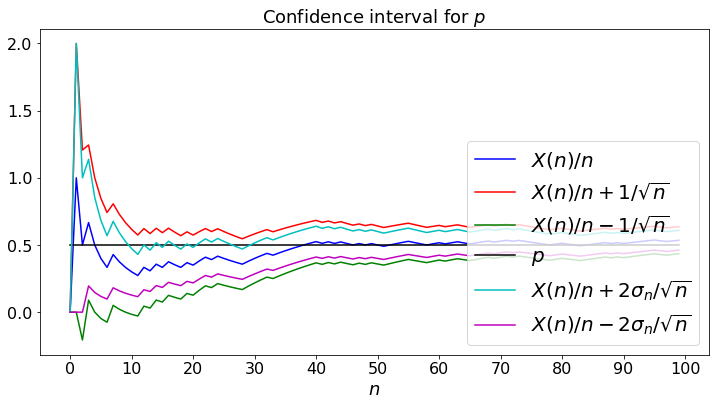

In [6]:
def CLT1_demo(N,p):
    sMean = np.zeros(N)# sample mean
    sVar = np.zeros(N) # sample variance
    Dev = np.zeros(N)  # std. dev.
    sDev = np.zeros(N) # sample std. dev.
    Mean = p*np.ones(N)
    for n in range(0,N-1):
        y = np.random.binomial(1,p)
        sMean[n+1] = (n*sMean[n] + y)/(n+1)
        Dev[n+1] = (n+1)**(- 0.5)
        sVar[n+1] = (n*sVar[n] + y**2)/(n+1)
        sDev[n+1] = (sVar[n+1]/(n+1))**(0.5)
    plt.xlabel("$n$")
    plt.title("Confidence interval for $p$") 
    plt.plot(sMean, color='b',label="$X(n)/n$") 
    plt.plot(sMean + Dev, color='r',label="$X(n)/n + 1/\sqrt{n}$")
    plt.plot(sMean - Dev, color='g',label="$X(n)/n - 1/\sqrt{n}$")
    plt.plot(Mean, color='black',label="$p$")
    plt.plot(sMean + sDev, color='c',label="$X(n)/n + 2 \sigma_n/\sqrt{n}$")
    plt.plot(sMean - sDev, color='m',label="$X(n)/n - 2 \sigma_n/\sqrt{n}$")
    plt.legend(loc='lower right')
    d =[0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    d = list(d)
    d = [int(x) for x in d]
    plt.xticks(d)
    
CLT1_demo(N,p) 
        

### I.i.d. Random Variables

Next, we consider random variables $Y_m$ that are i.i.d. In case (a), they are $U[0, 1]$; in case (b), they are $U\{1, 2, \ldots, 6\}$; in case (c), they are $Expo(1)$.  

In [7]:
def dummy(Nd,cased):
    global N, case
    N, case = int(Nd), str(cased)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)
cased = widgets.ToggleButtons(options=['(a)', '(b)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, Nd = Nd,cased=cased) 
display(z)

interactive(children=(Dropdown(description='N', index=4, options=('10', '30', '50', '70', '100', '150', '200',…

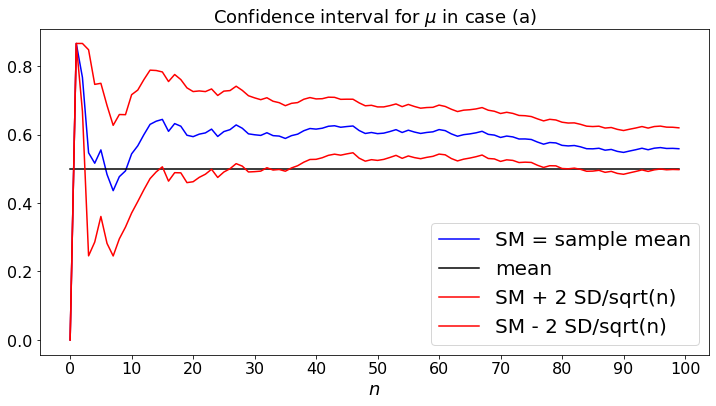

In [8]:
def CLT2_demo(case,N):
    sMean = np.zeros(N) # sample mean
    sVar = np.zeros(N) # sample variance
    sDev = np.zeros(N) # sample std. dev.
    if case == '(a)':
        mu = 0.5
    elif case == '(b)':
        mu = 3.5
    elif case == '(c)':
        mu = 1
    Mean = mu*np.ones(N)
    for n in range(0,N-1):
        y = 0
        if case == '(a)':
            y = np.random.random()
        elif case == '(b)':
            y = np.random.randint(1,7)
        else:
            y = np.random.exponential(1)        
        sMean[n+1] = (n*sMean[n] + y)/(n+1)
        sVar[n+1] = (n*sVar[n] + (y - sMean[n+1])**2)/(n+1)
        sDev[n+1] = (sVar[n+1]/(n+1))**(0.5) 
    plt.xlabel("$n$")
    plt.title("Confidence interval for $\mu$ in case " + str(case)) 
    plt.plot(sMean, color='b',label="SM = sample mean") 
    plt.plot(Mean, color='black',label="mean")
    plt.plot(sMean + 2*sDev, color='r',label="SM + 2 SD/sqrt(n)")
    plt.plot(sMean - 2*sDev, color='r',label="SM - 2 SD/sqrt(n)")
    plt.legend(loc = 'lower right')
    d =[0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    d = list(d)
    d = [int(x) for x in d]
    plt.xticks(d)
    
CLT2_demo(case,N)

## Polling

How many coins do we have to flip in order to estimate $p$ within $3\%$ with $95\%$ confidence?  That is, how large should $n$ be for the confidence interval (3.12) to be $\pm 3\%$? One needs $1/\sqrt{n} = 3\%$, so that $n = (1/0.03)^2 = 1112.$

As a standard application, assume that the potential voters in the next presidential election choose candidate $A$ with probability $p$ and candidate $B$ otherwise.  By polling $1112$ people, one can estimate $p$ with a margin of error of $3\%$, with $95\%$ confidence.  

## Connection Multiplexing

Imagine $N$ Internet users in one office building.  They share the building's Internet access link that has rate $1$Gbps $= 10^9$bps.  How large can $N$ be if we want every active user to have an acess rate equal to $10$Mbps $= 10^7$bps?  (One assumes that the active users get an equal share of the access link.)

### First Estimate

If the $N$ users are all active, we need $N \times 10^7 \leq 10^9$, i.e., $N \leq 100$.

### Second Estimate

However, users are not active all the time.  Say that a user is active $10\%$ of the time.  Then we expect to need $0.1 \times N \times 10^7 \leq 10^9$, i.e., $N \leq 1000$.

### Third Estimate

We suspect that the calculation above is a bit optimistic.  Indeed, it assumes that exactly $10\%$ of the users are active all the time.  What if more than $10\%$ of the users happen to be active at the same time?  Say that the users are active independently with probability $p = 0.1$.  Using (3.1) and (3.4) and the symmetry of the pdf (3.2), we find that

$$P(\frac{X(N) - Np}{\sqrt{Np(1-p)}} \geq 2) \approx \frac{5\%}{2} = 2.5\%.$$

Equivalently,

$$P(X(N) > Np + 2 \sqrt{Np(1 - p)}) \approx 2.5\%.$$

Thus, if we choose $N$ so that $(Np + 2 \sqrt{Np(1 - p)})10^7 \leq 10^9$, then we know that $P(10^7 X(N) \geq 10^9) \approx 2.5\%$, so that the users have access to $10$Mbps at least $97.5\%$ of the time.  With $p = 0.1$, the inequality becomes $0.1N + 0.6 \sqrt{N} \leq 100$.  Equivalently, $N \leq 828$.  

## Multiple Access

#### ALOHA

The **Aloha** protocol is a randomized multiple acess scheme that radios can use to share one channel.  In its basic form, time is divided into slots whose length suffices to transmit a packet.  There are $N$ radios.  In each time slot, every radio transmits independently with probability $p$.  Thus, the number $X$ of radios that transmit 
in one time slot is such that $X =_D B(N,p)$.  A time slot is wasted unless exactly one radio transmits.  Thus, the probability of success is $P(X = 1) = Np(1 - p)^{N-1}$.  This probability is maximized when $p = 1/N$, in which case one has $P(X = 1) = (1 - 1/N)^{N-1} \approx 1/e \approx 36\%.$

Here is a plot of $P(X = 1)$.

In [9]:
def dummy(Nd):
    global N
    N = int(Nd)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='N', index=4, options=('10', '30', '50', '70', '100', '150', '200',…

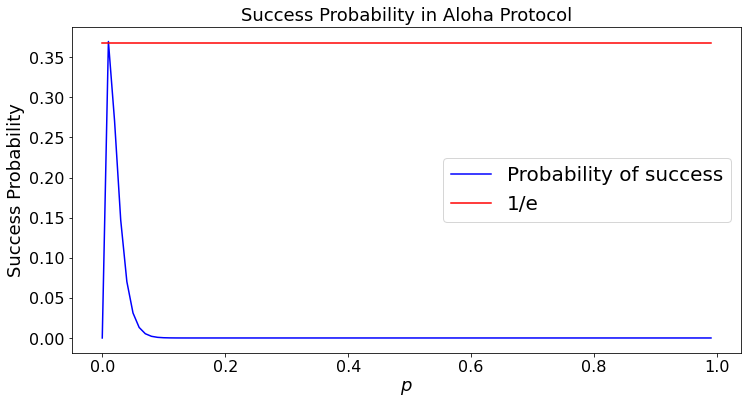

In [10]:
def CSMA1_demo(N):
    M = 100
    PSuccess = np.zeros(M)
    oneOverE = np.exp(-1)*np.ones(M)
    pValues = np.zeros(M)
    for n in range(0,M):
        x = n/M
        pValues[n] = x
        PSuccess[n] = N*x*(1 - x)**(N-1)
    plt.plot(pValues,PSuccess, color='b', label = 'Probability of success')
    plt.plot(pValues,oneOverE, color='r', label = "1/e")
    plt.legend()
    plt.ylabel("Success Probability")
    plt.xlabel("$p$")
    plt.title("Success Probability in Aloha Protocol")

CSMA1_demo(N)

### Backoff Slots 

In the basic Aloha protocol, recall that the nodes transmit independently with probability $p$ in each time slot.  Here, we consider a small variation of the protocol.  Time is divided into small slots that are long enough so that if on node transmits first in a slot, the other nodes hear that transmission and do not try to transmit until the first node has finished sending its packet, which takes $M$ slots.  

In this case, there may be a number of idle slots followed by a first non-idle one.  Let $X$ be the number of transmission in a slot.  Thus, $X = B(N,p)$ where there are $N$ active nodes. The probability that a slot is not idle is $\alpha := P(X > 0) = 1 - P(X = 0) = 1 - (1 - p)^N$.  The probability that a non-idle slot is occupied by a single transmission is 

$$P[X = 1 | X > 0] = P(X = 1)/P(X > 0) = Np(1-p)^{N-1}/\alpha =: \beta/\alpha.$$  

The average number of slots until the first nonempty one is $1/\alpha$.  Thus, on average, there are $1/\alpha - 1$ idle slots, followed by $M$ transmission slots with probability $\beta/\alpha$ or $M$ wasted slots with probability $1 - \beta/\alpha$ because of a collision.  The average duration of this cycle is $1/\alpha - 1 + M$.  Accordingly, the fraction of time that the node uses to transmit successfully is given by

$$\eta = \frac{M \beta/\alpha}{1/\alpha - 1 + M} = \frac{M \beta}{(M-1) \alpha + 1}.$$

The code below plots the value of $\eta$ as a function of $p$.

In [11]:
def dummy(Md,Nd):
    global M, N
    M, N = int(Md), int(Nd)
    
Md = widgets.Dropdown(options=['10', '20', '30', '40','50','60','70','80','90','100'],value='50',description='M',disabled=False)
Nd = widgets.Dropdown(options=['1', '3', '5', '7','10','13','15','18','20'],value='5',description='N',disabled=False)

z = widgets.interactive(dummy, Md=Md, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='M', index=4, options=('10', '20', '30', '40', '50', '60', '70', '8…

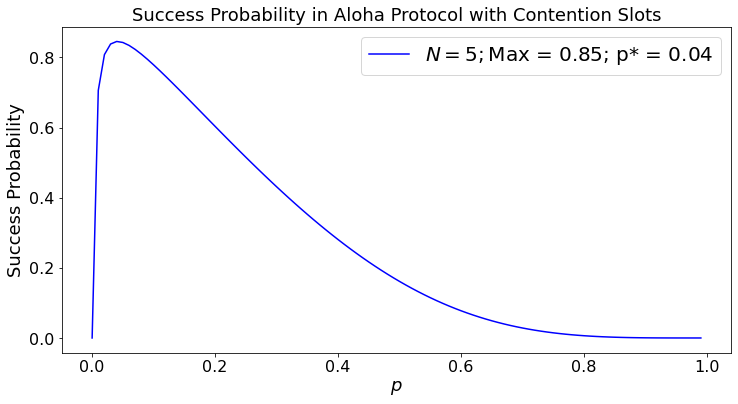

In [12]:
def CSMA3_demo(N,M):
    S = 100
    a = np.arange(0.0,S)
    b = np.arange(0.0,S)
    for i in range(1,S):
        p = i/S
        alpha = 1 - (1 - p)**N
        beta = N*p*(1 - p)**(N-1)
        b[i] = M*beta/((M-1)*alpha + 1) 
        a[i] = p
    maxb = max(b)
    pb = np.argmax(b)/S
    plt.plot(a, b, color='b', label = "$N = 5; $" + "Max = " + "%.2f"%maxb + "; p* = " + "%0.2f"%pb)
    plt.legend()
    plt.ylabel("Success Probability")
    plt.xlabel("$p$")
    plt.title("Success Probability in Aloha Protocol with Contention Slots")
    
CSMA3_demo(N,M)         

The graph shows that the efficiency of this protocol is close to $80\%$, much larger than the efficiency $1/e \approx 36\%$ of the basic protocol.  What is the basic cause of this increase in efficiency?  In the basic scheme, a cycle is successful if exactly one radio transmits.  In this scheme, a cycle is successful if the first nonempty contention slot is used by a single radio.  This latter probability can be made close to one if the probability of transmitting in one slot is very small.  However, the tradeoff is that this increases the number of idle contention slots before the first transmission.  

#### RTS/CTS ALOHA

In the basic Aloha protocol, a transmission slot is wasted when two or more radios transmit.  A more efficient protocol uses a request to send (RTS) and clear to send (CTS) mechanism that operates as follows.  Time is divided into one contention slots, one acknowledgment slot, then $M$ transmission slots.  During the contention slot, the $N$ active radios transmit independently an RTS with probability $p$ that indicate the ID of their intended destination.  If a radio was successful in marking a reservation, the radio with the ID indicated in the reservation acknowledges the request by sending a CTS. In that case, the successful radio transmits during the next $M$ slots.  If no radio is acknowledged, the process restarts. The figure below illustrates the operations.

![title](Figs/CSMA2.pdf)

In this figure, during the first slot, one radio is successful in making a reservation for detination $B$, i.e., it is alone transmitting a reservation.  During the next slot, radio $B$ acknowledges the reservation.  Durning the next $M$ slots, all the radios then listen to the channel, except for the successful radio that transmits its packet.  At the end of that transmission, when the channel is idle again, the process repeats. However, it turns out that no station makes a reservation during the next slot, no radio sends an acknowledgment.  After this second idle slot, the process repeats but this time more than one radio attempts to make a reservation. Consequently, no radio sends an acknowledgmment after that collision.

With probability $\alpha = Np(1-p)^{N-1}$, the contention slot is successful. In that case, there are $2 + M$ slots of which $M$ are occupied with transmissions.  With probability $1 - \alpha$ there are $2$ wasted slots.
Thus, the fraction of useful slots is

$$\eta := \frac{M \alpha}{2 + M \alpha}.$$

Ideally, $p = 1/N$, so that $\alpha \approx 1/e$.  In that case, $\eta \approx M/(5.6 + M)$.  If $M = 40$, then $\eta \approx 88\%$.  If $N = 100,$ then $\eta \approx 95\%$.

If $p$ is not optimized, $\alpha < 1/e$ and $\eta$ is smaller.  Here is a plot.

In [13]:
def dummy(Md,Nd):
    global M, N
    M, N = int(Md), int(Nd)
    
Md = widgets.Dropdown(options=['10', '20', '30', '40','50','60','70','80','90','100'],value='50',description='M',disabled=False)
Nd = widgets.Dropdown(options=['1', '3', '5', '7','10','13','15','18','20'],value='5',description='N',disabled=False)

z = widgets.interactive(dummy, Md=Md, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='M', index=4, options=('10', '20', '30', '40', '50', '60', '70', '8…

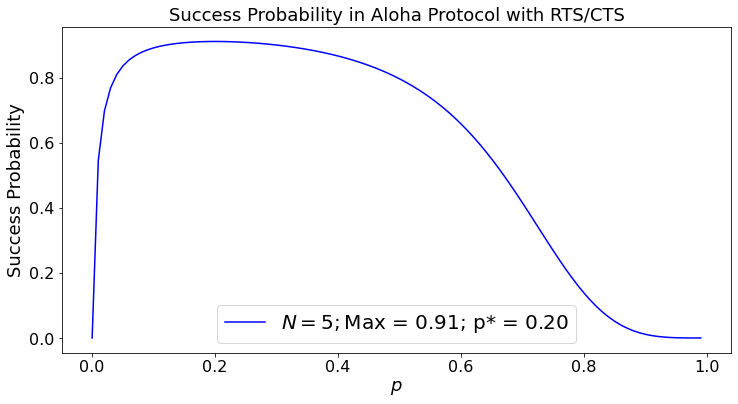

In [14]:
def CSMA2_demo(N,M):
    S = 100
    a = np.arange(0.0,S)
    b = np.arange(0.0,S)
    for i in range(1,S):
        p = i/S
        alpha = N*p*(1 - p)**(N-1)
        b[i] = M/(M + 2/alpha) 
        a[i] = p
    maxb = max(b)
    pb = np.argmax(b)/S
    plt.plot(a, b, color='b', label = "$N = 5; $" + "Max = " + "%.2f"%maxb + "; p* = " + "%0.2f"%pb)
    plt.legend()
    plt.ylabel("Success Probability")
    plt.xlabel("$p$")
    plt.title("Success Probability in Aloha Protocol with RTS/CTS")
    
CSMA2_demo(N,M)

This example shows that the RTS/CTS mechanism improves the efficiency of Aloha. Moreover, it shows that choosing $p = 0.1$ is reasonable as long as the number $N$ of active radios is not larger than $20$.  The efficiency of this scheme is similar to that of the contention slots mechanism.  However, the RTS/CTS has another benefit: by listening to the CTS message, the radios close to the intended destination know they should not transmit until the destination acknowledges the reception of the packet. This is useful, because some of those radios may hear the destination but not the source of the packet. 

### Event-Driven Simulation

In the next cell we simulate a buffer that serves customers with i.i.d. $U[5,25]$ service times and i.i.d. $U[3,A]$ interarrival times.  The point of the example is to illustrate **event-driven simulation** in Python.  An event is either an arrival or a service completion.  There is a source and a queue.  A service completion decreases the number of customers and generates a new service completion time.  Such a queue is called a GI/GI/1 queue because the interarrival times and service times are i.i.d. and there is a single server.

The point of event-driven simulation is to jump from event to event and not waste time simulating steps where nothing happens.

In [15]:
def dummy(Ad,Nd):
    global A, N
    A, N = int(Ad), int(Nd)
    
Nd = widgets.Dropdown(options=['10', '20', '30', '40','50','60','70','80','90','100'],value='50',description='N',disabled=False)
Ad = widgets.Dropdown(options=['16', '18', '20', '22','24','26','28','30'],value='20',description='N',disabled=False)

z = widgets.interactive(dummy, Ad=Ad, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='N', index=2, options=('16', '18', '20', '22', '24', '26', '28', '3…

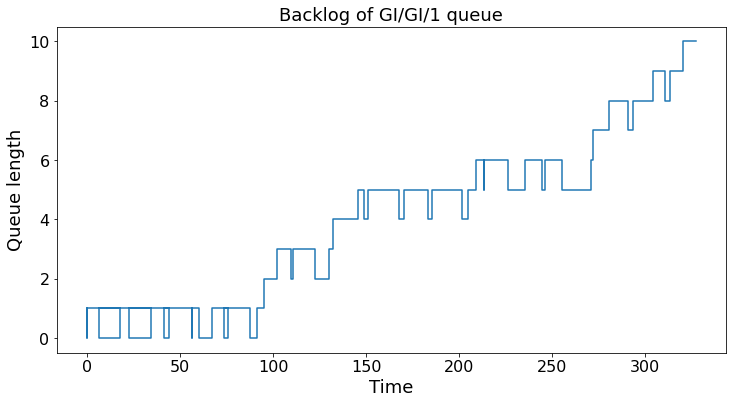

In [16]:
def queue_demo(N,A): # N is the number of events, A is the parameter in U[0,A] interarrival times
    queue_length = 0 # = number of customers
    service_completion_time = 0 # next service completion time
    next_arrival_time = 0 # = time  until next arrival
    time = 0 # keeps track of the real time
    Q = np.zeros(N) # list queue lengths
    T = np.zeros(N) # list times when the queue length changes
    for n in range(N):
        if queue_length == 0 or (queue_length > 0 and service_completion_time > next_arrival_time): # arrival            
            time = next_arrival_time # arrival into queue at 'time'
            T[n] = time
            next_arrival_time = time + np.random.uniform(3,A) # next arrival time
            queue_length += 1
            Q[n] = queue_length            
        else: # departure
            time = service_completion_time
            T[n] = time
            queue_length = max(0,queue_length-1)
            service_completion_time = time + np.random.uniform(5,25)
            Q[n] = queue_length
            
    plt.step(T, Q)
    plt.ylabel("Queue length")
    plt.xlabel("Time")
    plt.title("Backlog of GI/GI/1 queue")
    
queue_demo(N,A)           